** #Proyek Analisis Data: Bike Sharing Dataset**

- **Nama:** Marsella Patricia
- **Email:** marsellaptrcia@gmail.com
- **ID Dicoding:** marsellaptrcia

## Menentukan Pertanyaan Bisnis

- Faktor apa yang dapat menentukan banyak atau sedikitnya jumlah penyewaan sepeda?
- Pada jam berapakah peak hours penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Untuk suppress warning terkait FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling

### Gathering Data

Pada tahap Gathering Data, data berupa csv diupload ke session storage (Google Colab) dan dibaca dengan menggunakan function di library pandas yaitu read_csv. Lalu selanjutnya ditampilkan 5 data teratas dari file data day dan hour pada bike sharing dataset

In [3]:
day_data = pd.read_csv('/content/day.csv')
day_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_data = pd.read_csv('/content/hour.csv')
hour_data.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data bike sharing per hari memiliki 16 kolom/atribut, dan data bike sharing per jam memiliki 17 kolom/atribut yaitu 1 atribut extra: hour
- Beberapa jenis atribut kategorikal seperti musim direpresentasikan menjadi numerikal (1 untuk Spring, 2 untuk Summer, dst)

### Assessing Data

Selanjutnya masuk ke tahap assessing data, method info() dapat digunakan untuk memeriksa tipe data dari tiap kolom dan apakah ada missing value di tiap kolom, serta jumlah data (row) nya.

In [5]:
day_data.info()
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

Setelah mengecek ada atau tidaknya missing value, dapat dilakukan juga pengecekan terhadap data duplikat dengan method duplicated()

Metode describe() dapat digunakan untuk menampilkan ringkasan parameter statistik seperti mean, medium, dst.

In [6]:
print("Jumlah duplikasi pada data day: ", day_data.duplicated().sum())
day_data.describe()

Jumlah duplikasi pada data day:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
print("Jumlah duplikasi pada data hour: ", hour_data.duplicated().sum())
hour_data.describe()

Jumlah duplikasi pada data hour:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada bike sharing dataset day dan hour tidak dapat missing value sehingga tidak perlu dilakukan drop atau imputasi apapun.
- Pada bike sharing dataset day dan hour tidak dapat data duplikat sehingga tidak perlu dilakukan drop data duplikat.
- Rata-rata (Mean) jumlah sewa per jam adalah sebanyak 189 dan per harinya sebanyak 4504

### Cleaning Data

Proses cleaning data dapat dimulai setelah kita mengetahui kurang lebih seperti apa isi dan karakteristik dataset tersebut, terlihat pada kedua dataset terdapat kolom/atribut instant yang berisi record index dan tidak diperlukan dalam proses analisa data karena hanya berupa penomoran sehingga kita dapat melakukan drop kolom.

In [8]:
day_data.drop('instant', axis=1, inplace=True)
day_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
hour_data.drop('instant', axis=1, inplace=True)
hour_data.head(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Pada info dataset sebelumnya, terlihat tipe kolom dteday masih berupa object, untuk itu perlu dikonversi dahulu menjadi datetime menggunakan function pandas yaitu to_datetime

In [10]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

print(day_data['dteday'].dtype)
print(hour_data['dteday'].dtype)

datetime64[ns]
datetime64[ns]


Tahap cleaning data berikutnya adalah mengubah tipe data kategorikal seperti weather, holiday menjadi kategori agar dapat lebih merepresentasikan data tersebut dengan maksud sebenarnya.

In [11]:
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in categorical_columns:
    day_data[column] = day_data[column].astype('category')

print(day_data.dtypes)

dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [12]:
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in categorical_columns:
    hour_data[column] = hour_data[column].astype('category')

print(hour_data.dtypes)

dteday        datetime64[ns]
season              category
yr                  category
mnth                category
hr                  category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


**Insight:**
- Kolom kategorikal seperti season diubah dari bentuk numerik menjadi kategorikal untuk menghindari misinterpretasi kedepannya. Seperti mean dari kolom season antara 1-4 yang tidak akan menggambarkan apa-apa.
- Kolom bertipe numerik akan dianalisa untuk melihat korelasi dengan jumlah penyewaan sepeda.

## Exploratory Data Analysis (EDA)

Pada tahap Eksplorasi Data di sini saya menggunakan data per hari (day_data) sebagai dataset untuk menjawab pertanyaan bisnis pertama dan mencari insight dari sebuah data tersebut.

Lalu dataset per jam (hour_data) akan digunakan untuk menjawab pertanyaan bisnis kedua dan mencari insight tambahan dari dataset tersebut.

### Explore : Mengeksplorasi (day_data) sebagai dataset untuk menjawab pertanyaan bisnis pertama dan mencari insight dari sebuah data tersebut. Lalu dataset per jam (hour_data) akan digunakan untuk menjawab pertanyaan bisnis kedua dan mencari insight tambahan dari dataset tersebut.

<font color="blue">Dataset Day</font>


Mengecek rangkuman parameter statistik hanya pada data numerik dan mengecek korelasi antar data numerik

In [13]:
day_data.describe(include='number')

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [14]:
numerical_data = day_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
print(numerical_data.corr())


               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991702  0.126963  -0.157944  0.627494
atemp      0.991702  1.000000  0.139988  -0.183643  0.631066
hum        0.126963  0.139988  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.183643 -0.248489   1.000000 -0.234545
cnt        0.627494  0.631066 -0.100659  -0.234545  1.000000


Terlihat faktor numerik yang lebih berkaitan dengan jumlah penyewaan sepeda adalah *atemp* atau suhu yang dirasakan dalam satuan *Celsius* yang sudah dinormalisasi. Sehingga semakin tinggi suhu atau semakin hangat, penyewaan sepeda juga meningkat.

Sebaliknya atribut *hum* (kelembaban) tidak berkorelasi dengan jumlah penyewaan sepeda.

Membuat Pivot Tabel untuk eksplorasi jumlah sewa berdasarkan data kategorikal

In [15]:
# Menghitung jumlah sewa berdasarkan season

# Mengubah isi atribut kategorikal season agar mudah dibaca
map_season  = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}
day_data['season'] = day_data['season'].cat.rename_categories(map_season)

bike_rental_by_season = (day_data.groupby(by='season', observed=False)['cnt']
                            .sum()
                            .sort_values(ascending=False)
                            .reset_index())
top_seasons = bike_rental_by_season.head()
print(top_seasons)


   season      cnt
0    fall  1061129
1  summer   918589
2  winter   841613
3  spring   471348


In [16]:
# Menghitung jumlah sewa berdasarkan weather situation

# Mengubah isi atribut kategorikal cuaca agar mudah dibaca
map_weather  = {
    1: 'Clear, Few Clouds',
    2: 'Mist, Cloudy',
    3: 'Light Snow, Light Rain',
    4: 'Heavy Rain, Ice Pallets'
}
day_data['weathersit'] = day_data['weathersit'].cat.rename_categories(map_weather)

bike_rental_by_weather = (day_data.groupby(by='weathersit', observed=False)['cnt']
                            .sum()
                            .sort_values(ascending=False)
                            .reset_index())
top_weather = bike_rental_by_weather.head()
print(top_weather)


               weathersit      cnt
0       Clear, Few Clouds  2257952
1            Mist, Cloudy   996858
2  Light Snow, Light Rain    37869


In [17]:
print(day_data['weathersit'].unique())


['Mist, Cloudy', 'Clear, Few Clouds', 'Light Snow, Light Rain']
Categories (3, object): ['Clear, Few Clouds', 'Mist, Cloudy', 'Light Snow, Light Rain']


In [18]:
# Menghitung jumlah sewa berdasarkan hari

# Mengubah isi atribut kategorikal hari agar mudah dibaca
map_weekday  = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
}
day_data['weekday'] = day_data['weekday'].cat.rename_categories(map_weekday)

bike_rental_by_weekday = (day_data.groupby(by='weekday', observed=False)['cnt']
                            .sum()
                            .sort_values(ascending=False)
                            .reset_index())
top_weekday = bike_rental_by_weekday.head(6)
print(top_weekday)


     weekday     cnt
0     Friday  487790
1   Thursday  485395
2   Saturday  477807
3  Wednesday  473048
4    Tuesday  469109
5     Monday  455503


Dari ketiga pivot table tersebut, diketahui jumlah penyewaan sepeda paling banyak ada di musim gugur (Fall Season), di saat cuaca cerah dan sedikit berawan (Clear, Few clouds, Partly cloudy, Partly cloudy) dan di hari Jumat

<font color="blue">Dataset Hour</font>


(Melakukan hal yang sama pada dataset day untuk mengetahui jumlah penyewaan per jamnya)

In [19]:
numerical_data = hour_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
print(numerical_data.corr())

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.987672 -0.069881  -0.023125  0.404772
atemp      0.987672  1.000000 -0.051918  -0.062336  0.400929
hum       -0.069881 -0.051918  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.062336 -0.290105   1.000000  0.093234
cnt        0.404772  0.400929 -0.322911   0.093234  1.000000


Terdapat sedikit perbedaan dari dataser harian, di mana yang lebih berkorelasi dengan jumlah penyewaan adalah *temp* atau temperatur dalam *celsius* yang sudah dinormalisasi.

In [20]:
# Menghitung jumlah sewa berdasarkan season

# Mengubah isi atribut kategorikal season agar mudah dibaca
map_season  = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}
hour_data['season'] = hour_data['season'].cat.rename_categories(map_season)

bike_rental_by_season = (hour_data.groupby(by='season', observed=False)['cnt']
                            .sum()
                            .sort_values(ascending=False)
                            .reset_index())
top_seasons = bike_rental_by_season.head()
print(top_seasons)


   season      cnt
0    fall  1061129
1  summer   918589
2  winter   841613
3  spring   471348


In [21]:
# Menghitung jumlah sewa berdasarkan weather situation

# Mengubah isi atribut kategorikal cuaca agar mudah dibaca
map_weather  = {
    1: 'Clear, Few Clouds',
    2: 'Mist, Cloudy',
    3: 'Light Snow, Light Rain',
    4: 'Heavy Rain, Ice Pallets'
}
hour_data['weathersit'] = hour_data['weathersit'].cat.rename_categories(map_weather)

bike_rental_by_weather = (hour_data.groupby(by='weathersit', observed=False)['cnt']
                            .sum()
                            .sort_values(ascending=False)
                            .reset_index())
top_weather = bike_rental_by_weather.head()
print(top_weather)


                weathersit      cnt
0        Clear, Few Clouds  2338173
1             Mist, Cloudy   795952
2   Light Snow, Light Rain   158331
3  Heavy Rain, Ice Pallets      223


In [22]:
# Menghitung jumlah sewa berdasarkan hari

# Mengubah isi atribut kategorikal hari agar mudah dibaca
map_weekday  = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
}
hour_data['weekday'] = hour_data['weekday'].cat.rename_categories(map_weekday)

bike_rental_by_weekday = (hour_data.groupby(by='weekday', observed=False)['cnt']
                            .sum()
                            .sort_values(ascending=False)
                            .reset_index())
top_weekday = bike_rental_by_weekday.head(6)
print(top_weekday)


     weekday     cnt
0     Friday  487790
1   Thursday  485395
2   Saturday  477807
3  Wednesday  473048
4    Tuesday  469109
5     Monday  455503


Hasil analisis pivot table dari data per jam dan per hari masih sama karena data per jam juga merupakan bagian dari data per hari, hal ini bisa diperkecil lagi dengan mengetahui jam berapa yang merupakan rush hour dalam jumlah sewa sepeda.

**Insight:**
- Dari data kategorikal, diketahui jumlah penyewaan sepeda paling banyak ada di musim gugur, pada hari Jumat, dan saat cuaca sedang cerah dan berawan.
- Dari data numerikal, jumlah penyewaan sepeda berkorelasi dengan temperatur yang dirasakaan saat itu dalam satuan celsius, di mana di saat suhu makin tinggi (menghangat), penyewaan sepeda juga lebih banyak.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Faktor apa yang dapat menentukan banyak atau sedikitnya jumlah penyewaan sepeda?

Visualisasi Heatmap untuk menggambarkan hasil korelasi numerik sebelumnya

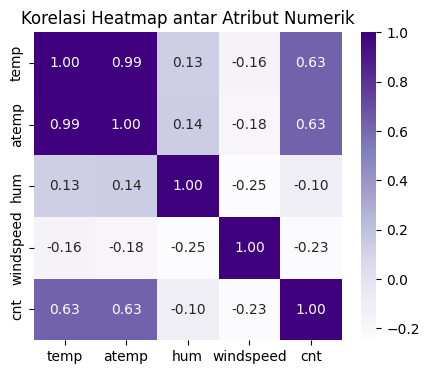

In [23]:
correlation_matrix = day_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Purples', square=True)
plt.title('Korelasi Heatmap antar Atribut Numerik')
plt.show()

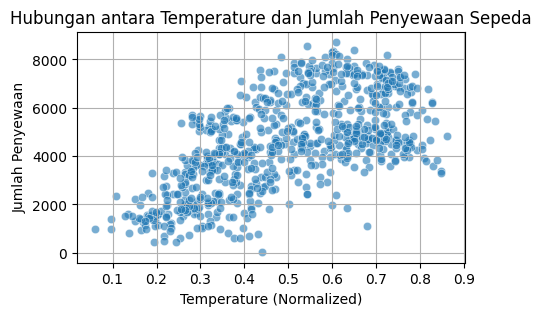

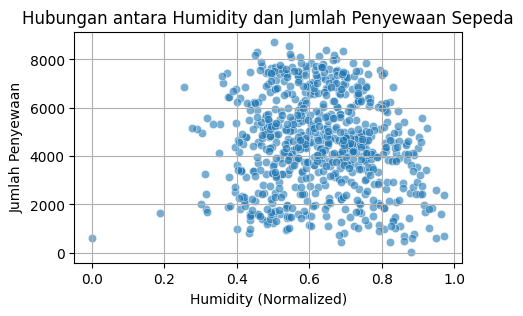

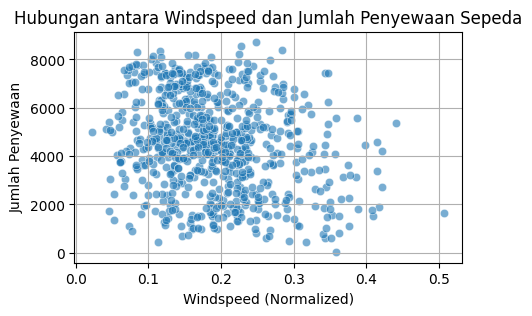

In [24]:
# Scatter plot untuk melihat hubungan antara temperature dan jumlah penyewaan
plt.figure(figsize=(5, 3))
sns.scatterplot(x='temp', y='cnt', data=day_data, alpha=0.6)
plt.title('Hubungan antara Temperature dan Jumlah Penyewaan Sepeda')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()

# Scatter plot untuk humidity
plt.figure(figsize=(5, 3))
sns.scatterplot(x='hum', y='cnt', data=day_data, alpha=0.6)
plt.title('Hubungan antara Humidity dan Jumlah Penyewaan Sepeda')
plt.xlabel('Humidity (Normalized)')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()

# Scatter plot untuk windspeed
plt.figure(figsize=(5, 3))
sns.scatterplot(x='windspeed', y='cnt', data=day_data, alpha=0.6)
plt.title('Hubungan antara Windspeed dan Jumlah Penyewaan Sepeda')
plt.xlabel('Windspeed (Normalized)')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()


Visualisasi Barplot untuk menggambarkan pivot table sebelumnya

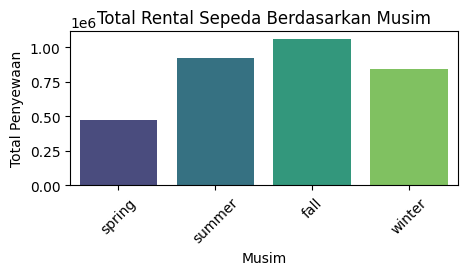

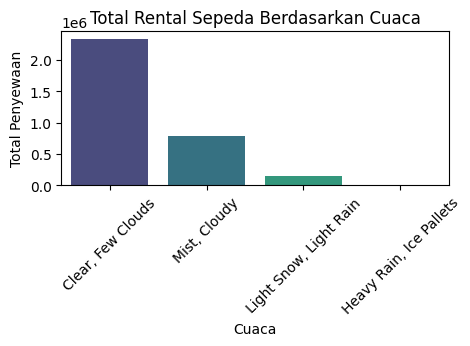

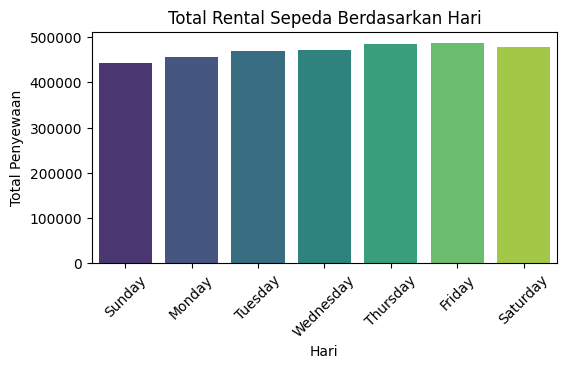

In [25]:
# Visualisasi untuk musim
plt.figure(figsize=(5, 2))
sns.barplot(x='season', y='cnt', data=bike_rental_by_season, palette='viridis')
plt.title('Total Rental Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=45)
plt.show()

# Visualisasi untuk cuaca
plt.figure(figsize=(5, 2))
sns.barplot(x='weathersit', y='cnt', data=bike_rental_by_weather, palette='viridis')
plt.title('Total Rental Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=45)
plt.show()

# Visualisasi untuk hari
plt.figure(figsize=(6, 3))
sns.barplot(x='weekday', y='cnt', data=bike_rental_by_weekday, palette='viridis')
plt.title('Total Rental Sepeda Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:Pada jam berapakah peak hours penyewaan sepeda?

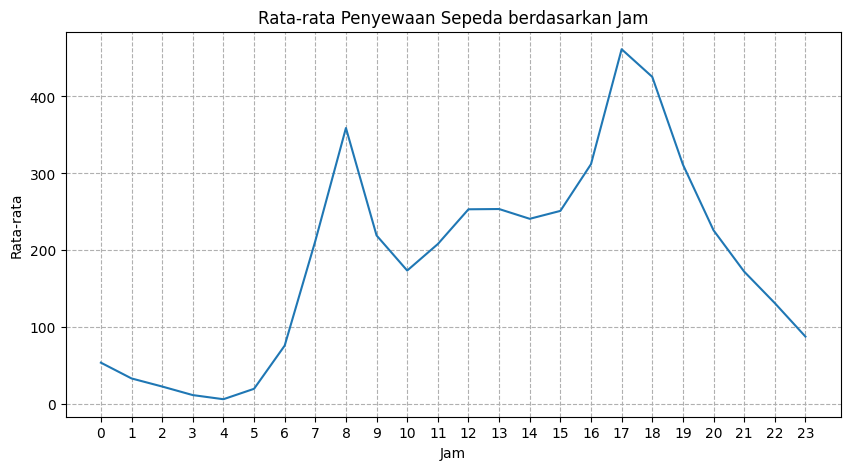

In [26]:
rental_per_jam = hour_data.groupby('hr')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(rental_per_jam['hr'], rental_per_jam['cnt'])
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--')
plt.show()

Dari Hasil analisa dengan visualisasi data line chart, dapat terlihat *peak hours* penyewaan sepeda adalah rata-rata di jam 8 pagi dan jam 5 sore, hal ini dapat diasumsikan merupakan jam pergi kerja dan pulang kerja yang didukung dengan visualisasi berikut.

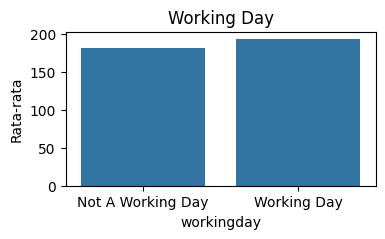

In [27]:
rata_rental = hour_data.groupby('workingday')['cnt'].mean().reset_index()

# Membuat bar plot
plt.figure(figsize=(4, 2))
sns.barplot(x='workingday', y='cnt', data=rata_rental)
plt.title('Working Day')
plt.ylabel('Rata-rata')
plt.xticks([0, 1], ['Not A Working Day', 'Working Day'])
plt.show()

**Insight:**
- Suhu memiliki korelasi positif tertinggi dengan jumlah penyewaan, sedangkan kelembaban memiliki korelasi negatif
- Musim dengan penyewaan tertinggi adalah musim gugur, musim dengan penyewaan terendah adalah musim semi.
- Saat sedang hujan deras dan badai petir, tidak ada rekor penyewaan sepeda.


## Analisis Lanjutan Binning

Selanjutnya mencoba mengelompokkan dengan teknik manual grouping dengan mengelompokkan jumlah sewa menjadi ketiga kategori yaitu Sepi, Normal, dan Ramai. Lalu melihat visualisasinya pada kategori musim, dan suhu dengan menggunakan teknik binning yang membagi suhu ke tiga kategori.

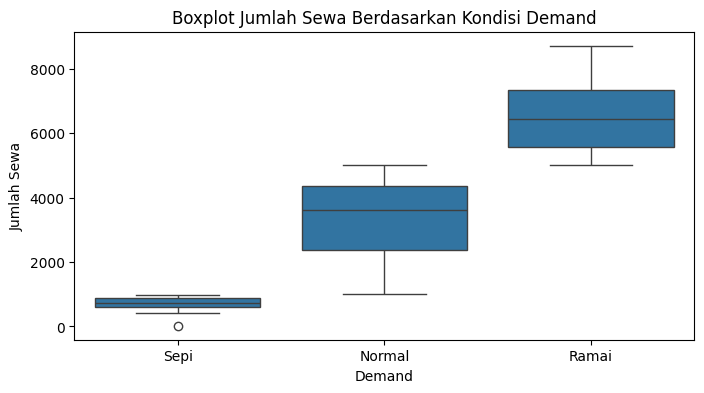

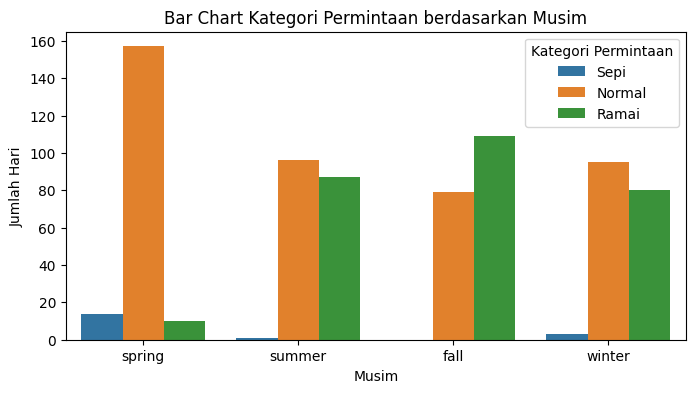

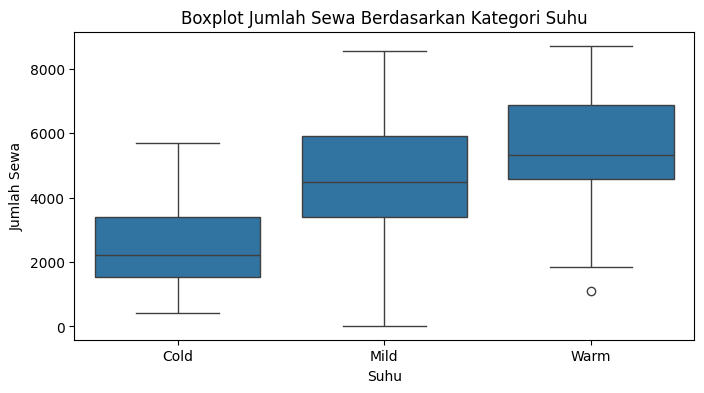

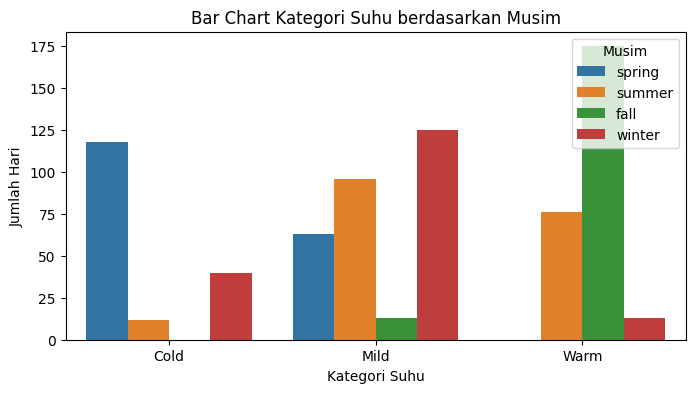

In [28]:
# Manual Grouping
def kondisi_sewa(count):
     if count < 1000:
        return "Sepi"
     elif count < 5000:
         return "Normal"
     else:
         return "Ramai"

day_data['demand_category'] = day_data['cnt'].apply(kondisi_sewa)

plt.figure(figsize=(8, 4))
sns.boxplot(x='demand_category', y='cnt', data=day_data)
plt.title('Boxplot Jumlah Sewa Berdasarkan Kondisi Demand')
plt.xlabel('Demand')
plt.ylabel('Jumlah Sewa')
plt.show()

# Analisis faktor yang mempengaruhi kategori permintaan
plt.figure(figsize=(8, 4))
sns.countplot(x='season', hue='demand_category', data=day_data)
plt.title('Bar Chart Kategori Permintaan berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Hari')
plt.legend(title='Kategori Permintaan')
plt.show()

# Binning suhu

day_data['temp_bins'] = pd.cut(day_data['temp'], bins=3, labels=['Cold', 'Mild', 'Warm'])

plt.figure(figsize=(8, 4))
sns.boxplot(x='temp_bins', y='cnt', data=day_data)
plt.title('Boxplot Jumlah Sewa Berdasarkan Kategori Suhu')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Sewa')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='temp_bins', hue='season', data=day_data)
plt.title('Bar Chart Kategori Suhu berdasarkan Musim')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Hari')
plt.legend(title='Musim')
plt.show()

Dengan analisa tambahan, dapat diketahui insight sebagai berikut:
- Musim dingin sangat mengurangi permintaan sepeda, yang mungkin disebabkan oleh cuaca dingin dan kurangnya kenyamanan bersepeda.
- Kategori suhu warm memiliki jumlah sewa tertinggi dibandingkan kategori Cold dan Mild.

## Conclusion

- Conclusion Pertanyaan 1

Faktor yang peling memengaruhi banyaknya penyewa sepeda dari tipe data numerikal adalah *Atemp* atau temperatur yang dirasakan dalam satuan Celsius, jika dari tipe data kategorikal, penyewaan sepeda paling banyak terjadi di musim gugur, di hari Jumat, dan pada saat Cuaca sedang cerah dan sedikit berawan.
- Conclusion Pertanyaan 2

Penyewaan sepeda lebih banyak terjadi saat working day dan di jam masuk kerja (8 pagi) dan jam pulang kerja jam (5 sore)

In [29]:
day_data.to_csv("day_data.csv", index=False)

In [30]:
hour_data.to_csv("hour_data.csv", index=False)